In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size =100)  # 功能：从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.
X = x.reshape(-1,1)  
y = 0.5*x**2 +x+2+np.random.normal(0,1,size = 100)

In [18]:
from sklearn.preprocessing import PolynomialFeatures  # 多项式特征

In [4]:
poly = PolynomialFeatures(degree =2)  # degree 参数的意义就是把多少次幂当作特征
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X2[:5,:]  #增加一列 1  是x的零次幂的系数

array([[ 1.00000000e+00, -1.85692455e-01,  3.44816880e-02],
       [ 1.00000000e+00, -4.23992084e-02,  1.79769288e-03],
       [ 1.00000000e+00,  2.80539481e+00,  7.87024007e+00],
       [ 1.00000000e+00, -2.76818244e+00,  7.66283401e+00],
       [ 1.00000000e+00, -1.05061170e+00,  1.10378495e+00]])

In [7]:
X[:5,:]

array([[-0.18569246],
       [-0.04239921],
       [ 2.80539481],
       [-2.76818244],
       [-1.0506117 ]])

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

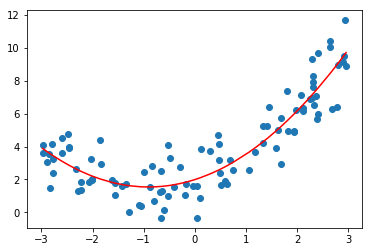

In [10]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color = "r")

In [11]:
lin_reg2.coef_  # 0是对应的全是1的那一列 

array([0.        , 0.99129621, 0.54635972])

In [12]:
lin_reg2.intercept_  # 截距 2 

1.9944301636132704

### 关于PolynormalFeatures

In [13]:
X = np.arange(1,11).reshape(-1,2)  # 
X.shape

(5, 2)

In [15]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [21]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(5, 6)

In [22]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [23]:
poly = PolynomialFeatures(degree = 3)
poly.fit(X)
X3 = poly.transform(X)
X3.shape

(5, 10)

In [24]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

## Pipeline

In [29]:
x = np.random.uniform(-3,3,size = 100)
X = x.reshape(-1,1)
y = 0.5 *x**2 +x+2+np.random.normal(0,1,100)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree =2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [33]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

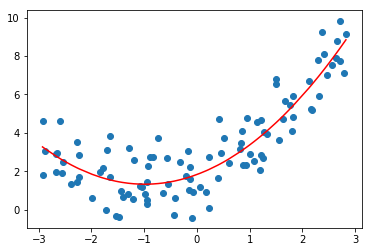

In [34]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color = "r")